In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dwinuragustina","key":"388d0e60f53427bc37203385da56aad0"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d madisona/translated-animals10

 98% 576M/586M [00:04<00:00, 148MB/s]
100% 586M/586M [00:04<00:00, 143MB/s]


In [5]:
# direktori baru
!mkdir datapict
!unzip -qq translated-animals10.zip -d datapict
!ls datapict

animals10


In [6]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (99.7 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure:

In [7]:
# melihat susunan direktori
!tree -d datapict/

datapict/
└── animals10
    └── raw-img
        ├── butterfly
        ├── cat
        ├── chicken
        ├── cow
        ├── dog
        ├── elephant
        ├── horse
        ├── sheep
        ├── spider
        └── squirrel

12 directories


In [8]:
# hapus direktori
import shutil

shutil.rmtree('datapict/animals10/raw-img/cat')
shutil.rmtree('datapict/animals10/raw-img/cow')
shutil.rmtree('datapict/animals10/raw-img/dog')
shutil.rmtree('datapict/animals10/raw-img/elephant')
shutil.rmtree('datapict/animals10/raw-img/butterfly')
shutil.rmtree('datapict/animals10/raw-img/sheep')
shutil.rmtree('datapict/animals10/raw-img/squirrel')

In [9]:
!tree -d datapict/

datapict/
└── animals10
    └── raw-img
        ├── chicken
        ├── horse
        └── spider

5 directories


In [10]:
!pip install split_folders tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import splitfolders

splitfolders.ratio('datapict/animals10/raw-img/', output = 'datapict/animals10/raw-img/data_model', seed = 3, ratio = (0.8, 0.2))

Copying files: 10542 files [00:02, 5056.66 files/s]


In [12]:
import os

base_dir = 'datapict/animals10/raw-img/data_model'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_chicken_dir = os.path.join(train_dir, 'chicken')
train_horse_dir = os.path.join(train_dir, 'horse')
train_spider_dir = os.path.join(train_dir, 'spider')

validation_chicken_dir = os.path.join(validation_dir, 'chicken')
validation_horse_dir = os.path.join(validation_dir, 'horse')
validation_spider_dir = os.path.join(validation_dir, 'spider')

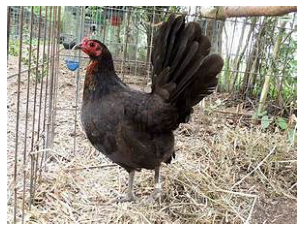

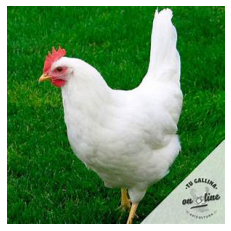

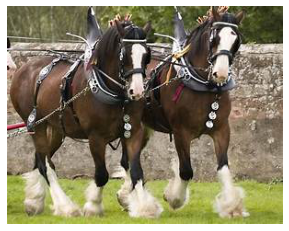

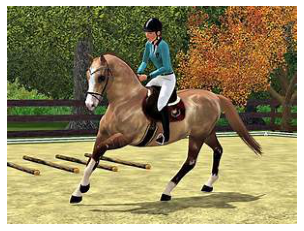

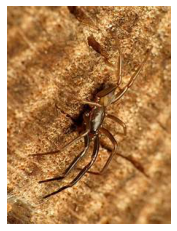

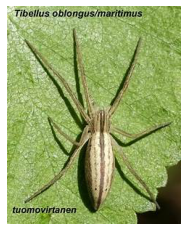

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

chicken_files = os.listdir(train_chicken_dir)
horse_files = os.listdir(train_horse_dir)
spider_files = os.listdir(train_spider_dir)

pic_index = random.randrange(0, 1000)

next_chicken = [os.path.join(train_chicken_dir, fname) 
                for fname in chicken_files[pic_index-2:pic_index]]
next_horse = [os.path.join(train_horse_dir, fname) 
                for fname in horse_files[pic_index-2:pic_index]]
next_spider = [os.path.join(train_spider_dir, fname) 
                for fname in spider_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_chicken + next_horse + next_spider):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [14]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  shear_range = 0.2,
                                  fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,  # direktori data latih
    target_size = (150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 20,
    class_mode = 'categorical')
 
validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size = (150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 20, 
    class_mode = 'categorical')

Found 8432 images belonging to 3 classes.
Found 2110 images belonging to 3 classes.


In [15]:
tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [16]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )

In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.85):
      print("\nAkurasi diatas 85%, training selesai!")
      self.model.stop_training = True

callbacks = myCallback()

In [18]:
  history = model.fit(train_generator, 
                    epochs = 100, 
                    steps_per_epoch = 32,
                    validation_data = validation_generator, 
                    validation_steps = 8,
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/100
32/32 [==============================] - 54s 2s/step - loss: 1.0967 - accuracy: 0.4172 - val_loss: 1.0630 - val_accuracy: 0.5250
Epoch 2/100
32/32 [==============================] - 49s 2s/step - loss: 1.0822 - accuracy: 0.4266 - val_loss: 1.0796 - val_accuracy: 0.4437
Epoch 3/100
32/32 [==============================] - 50s 2s/step - loss: 1.0577 - accuracy: 0.4609 - val_loss: 1.0547 - val_accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 49s 2s/step - loss: 1.0427 - accuracy: 0.5234 - val_loss: 1.0081 - val_accuracy: 0.5188
Epoch 5/100
32/32 [==============================] - 50s 2s/step - loss: 1.0331 - accuracy: 0.4812 - val_loss: 1.0287 - val_accuracy: 0.5063
Epoch 6/100
32/32 [==============================] - 51s 2s/step - loss: 1.0129 - accuracy: 0.4969 - val_loss: 0.9320 - val_accuracy: 0.5625
Epoch 7/100
32/32 [==============================] - 48s 2s/step - loss: 1.0157 - accuracy: 0.5203 - val_loss: 0.9379 - val_accuracy: 0.5875
Epoch 8/100
3

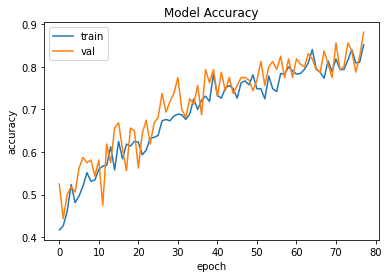

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

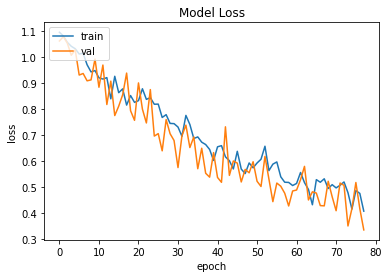

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [22]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [23]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root  13898160 Sep 10 12:51 model.tflite
